In [1]:
""" Imports """

import time
import os

import torch

from utils import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
""" Style model """

MODEL = "trained2"

In [3]:
""" Load input image """

input_img = image_loader("images/neckarfront.jpg", size=256)

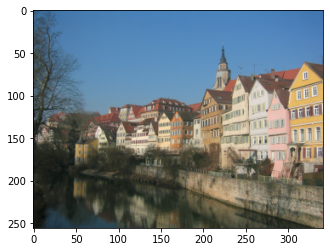

In [4]:
imshow(input_img)

In [5]:
""" load models """

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
style_subnet = torch.load('models/style_subnet_' + MODEL + '.pt', map_location='cpu').eval().to(device)


Start transforming on cuda..
Image transformed. Time for pass: 0.99s


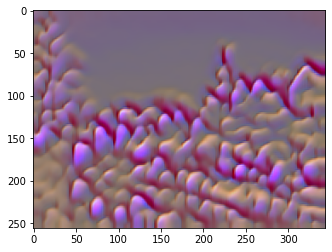

In [6]:
""" Transform """

print("Start transforming on {}..".format(device))
start = time.time()
with torch.no_grad():
    generated_img_256, resized_input_img_256 = style_subnet(input_img)
print("Image transformed. Time for pass: {:.2f}s".format(time.time() - start))

imshow(generated_img_256)
save_image(generated_img_256, title="generated_images/multimodal_" + MODEL + "_256")

In [7]:
# diff_256_orig = generated_img_256 - resized_input_img_256
# imshow(diff_256_orig)